# Author:

Github : https://github.com/cryptokoryo  
Twitter: https://twitter.com/CryptoKoryo 

Copyright 2023 @CryptoKoryo  
MIT License

# Description

An analyis of recent investments by crypto VCs and angels.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style()
%matplotlib inline

In [ ]:
# Data source : https://defillama.com/raises 
df = pd.read_csv('data/raises.csv')

In [10]:
# Covert to date fields and get quarters

df.Date = pd.to_datetime(df.Date,format='%Y/%m/%d')
df['year_quarter'] = df['Date'].apply(lambda x: f'{x.year}_Q{x.quarter}')
df.index = df.Date
del df['Timestamp']

In [11]:
df.head()

,Name,Date,Amount Raised,Round,Description,Lead Investor,Category,Source,Valuation,Chains,Other Investors,year_quarter
Date,,,,,,,,,,,,
2023-06-27,Mythical Games,2023-06-27,37000000.0,Series C+,Mythical Games is a video game engine for play...,Scytale Digital,Gaming,NaN,NaN,NaN,Ark Invest + a16z + Animoca Brands,2023_Q2
2023-06-27,Pixion Games,2023-06-27,5500000.0,Seed,NaN,NaN,Gaming,https://twitter.com/PixionGames/status/1673688...,NaN,Avalanche,NaN,2023_Q2
2023-06-26,MetaBlaze,2023-06-26,4000000.0,Presale,Play-to-earn NFT games,NaN,Gaming,https://twitter.com/meta_blaze/status/16733328...,NaN,NaN,NaN,2023_Q2
2023-06-22,Kaito,2023-06-22,5500000.0,Series A,AI-powered search engine for crypto,Superscrypt + The Spartan Group,Crypto Intelligence,https://twitter.com/_kaitoai/status/1671881662...,87.5,NaN,NaN,2023_Q2
2023-06-22,Vertex,2023-06-22,NaN,Strategic,Hybrid Orderbook-AMM DEX,Wintermute,DeFi,https://twitter.com/vertex_protocol/status/167...,NaN,Arbitrum,NaN,2023_Q2


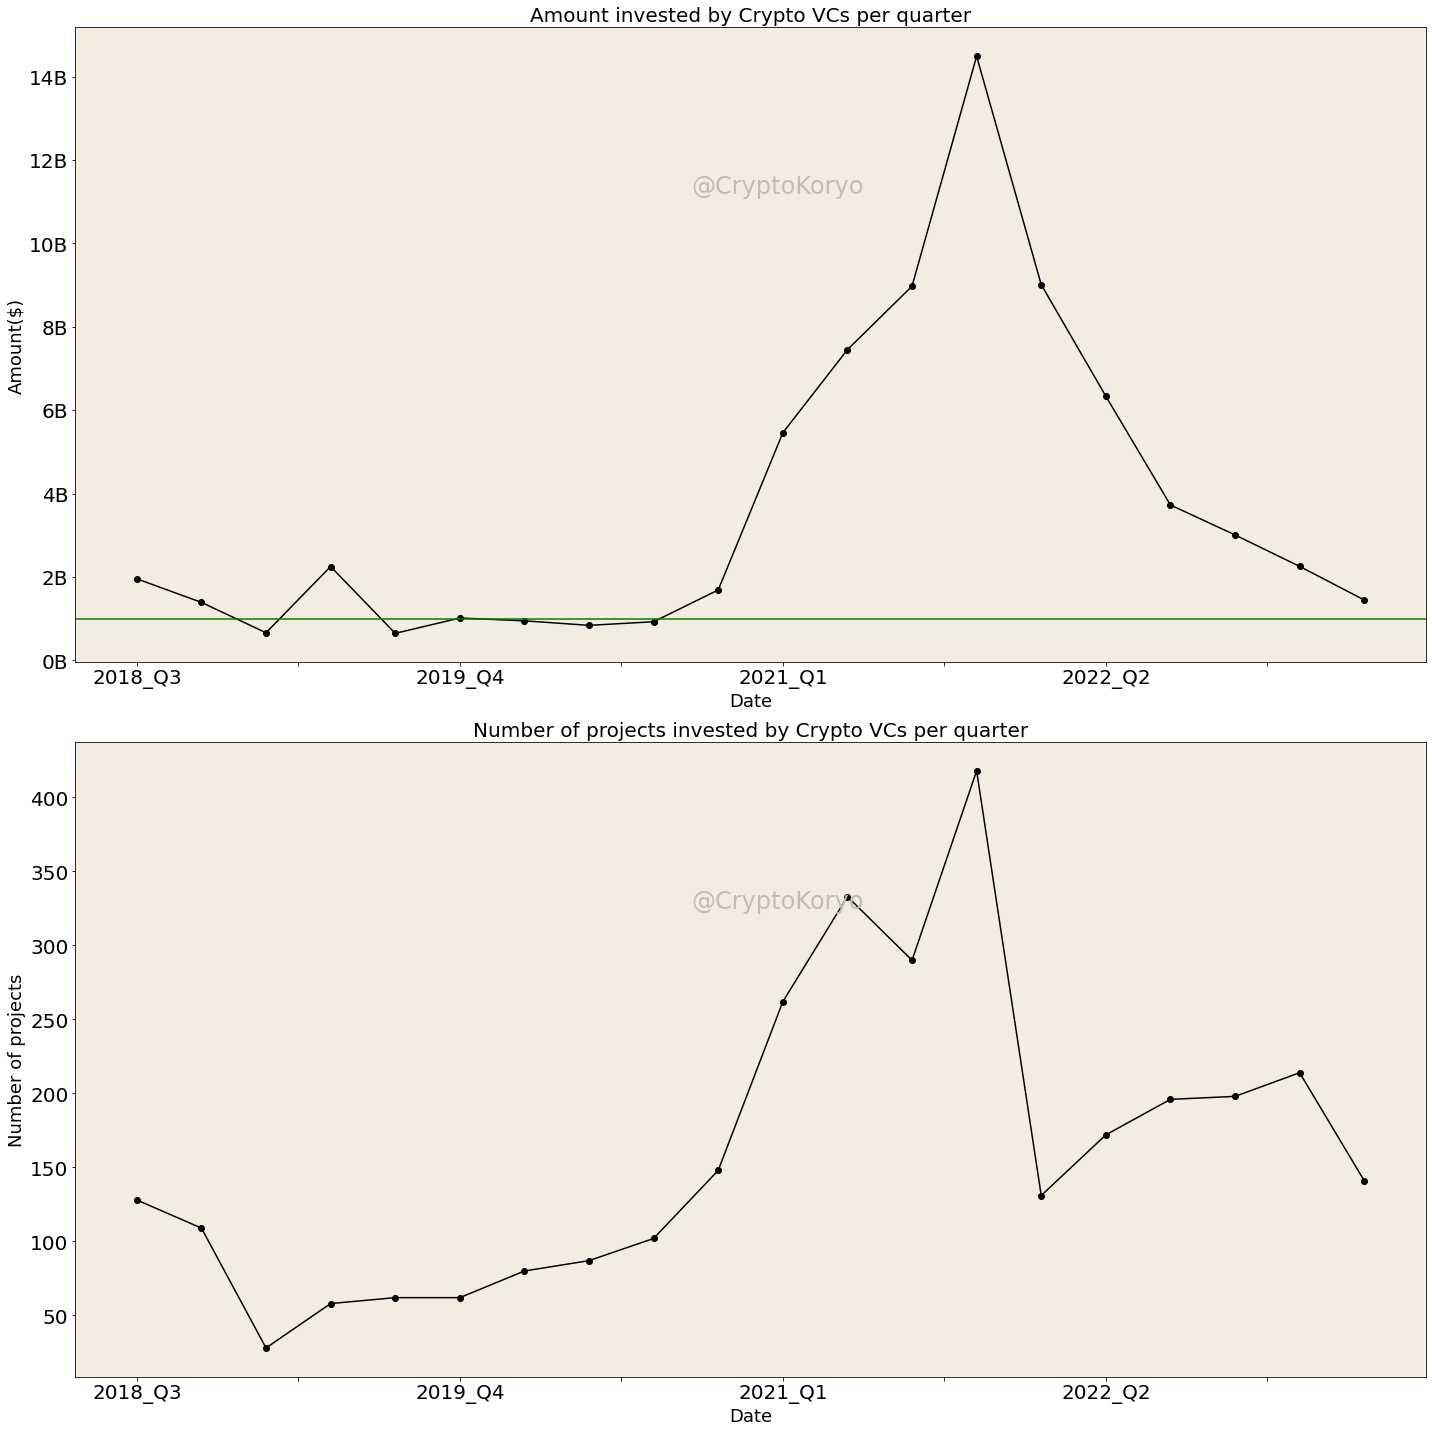

In [143]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 20), facecolor=(1, 1, 1))

# Chart 1
df.groupby('year_quarter').sum()[['Amount Raised']].tail(20).plot(ax=axs[0], marker='o', fontsize=20, color='black')
axs[0].set_title('Amount invested by Crypto VCs per quarter', fontsize=20)
axs[0].text(0.52, 0.75, '@CryptoKoryo', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes, fontsize=24, color='#c3bcb3')
axs[0].set_facecolor('#f4ece0')
axs[0].get_legend().remove()
axs[0].grid(False)
axs[0].set_xlabel('Date', fontsize=18)
axs[0].set_ylabel('Amount($)', fontsize=18)
axs[0].axhline(y=1e9, alpha=1.0, color='g')
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e9)}B'))


# Chart 2
df.groupby('year_quarter').count()[['Amount Raised']].tail(20).plot(ax=axs[1], marker='o', fontsize=20, color='black')
axs[1].set_title('Number of projects invested by Crypto VCs per quarter', fontsize=20)
axs[1].text(0.52, 0.75, '@CryptoKoryo', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes, fontsize=24, color='#c3bcb3')
axs[1].set_facecolor('#f4ece0')
axs[1].get_legend().remove()
axs[1].grid(False)
axs[1].set_xlabel('Date', fontsize=18)
axs[1].set_ylabel('Number of projects', fontsize=18)

plt.tight_layout()
#plt.savefig('data/plot1.png',bbox_inches='tight', dpi=300)
plt.show()

In [421]:
def plot_actor(actor):
    actor_df = df[df['Lead Investor'].fillna('').str.contains(actor)]
    
    plt.figure(figsize=(12,10), facecolor=(1, 1, 1))
    ax = plt.gca()
    # Number of last quarters
    N = 13
    actor_df.groupby('year_quarter').sum()[['Amount Raised']].tail(N).plot(ax=ax,marker='o',figsize=(16,12), fontsize=20,color='black')
    plt.title(f'{actor} investments per quarter', fontsize=20)



    plt.text(0.52,0.75,'@CryptoKoryo',horizontalalignment='center',
         verticalalignment='center', transform = ax.transAxes,fontsize=24, color='#c3bcb3')
    ax.set_ylabel('Count')
    ax.set_facecolor('#f4ece0')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))

    plt.grid(b=None)
    ax.get_legend().remove()
    ax.grid(False)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Amount($)', fontsize=18)
    
 
    plt.show()
    
    return 0

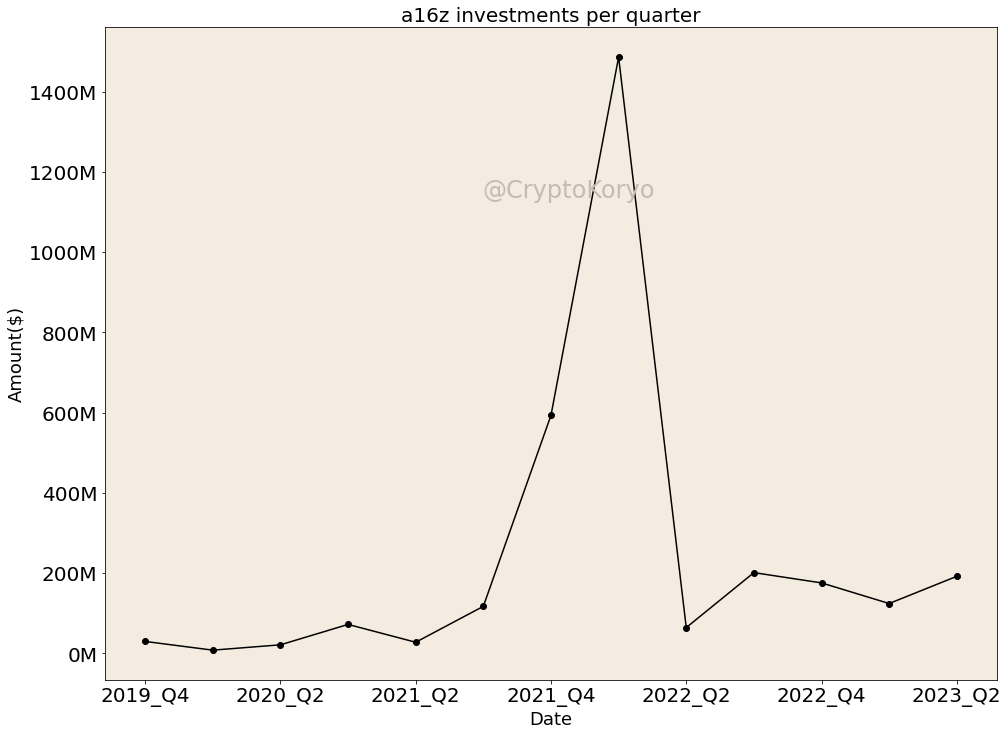

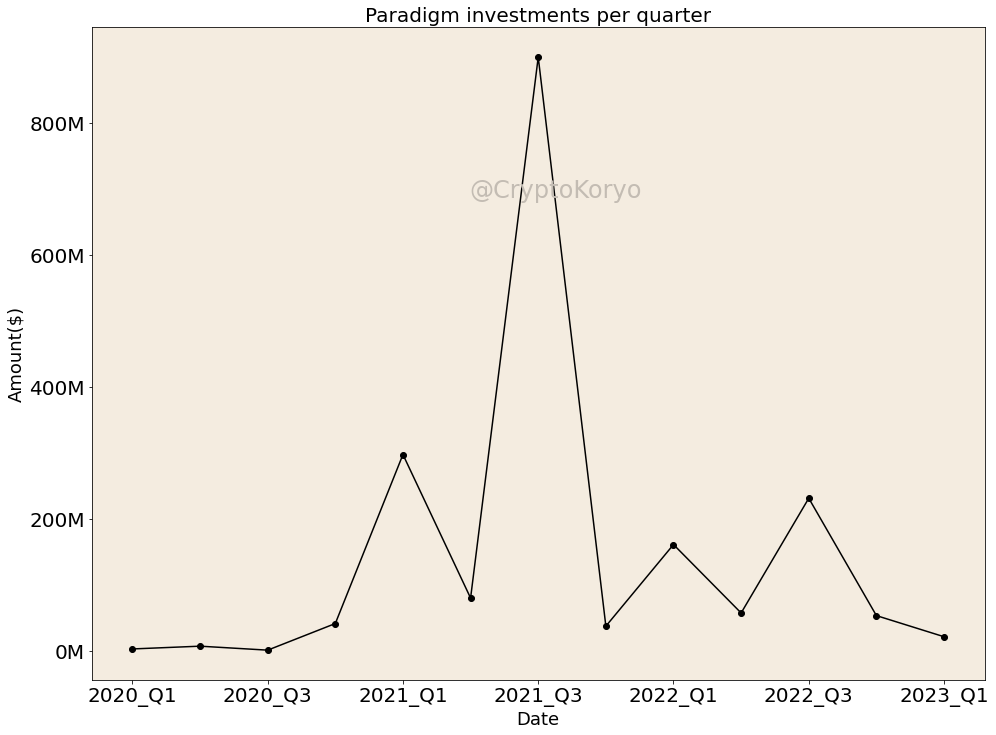

0

In [422]:
actor = 'a16z'
plot_actor(actor)

actor = 'Paradigm'
plot_actor(actor)

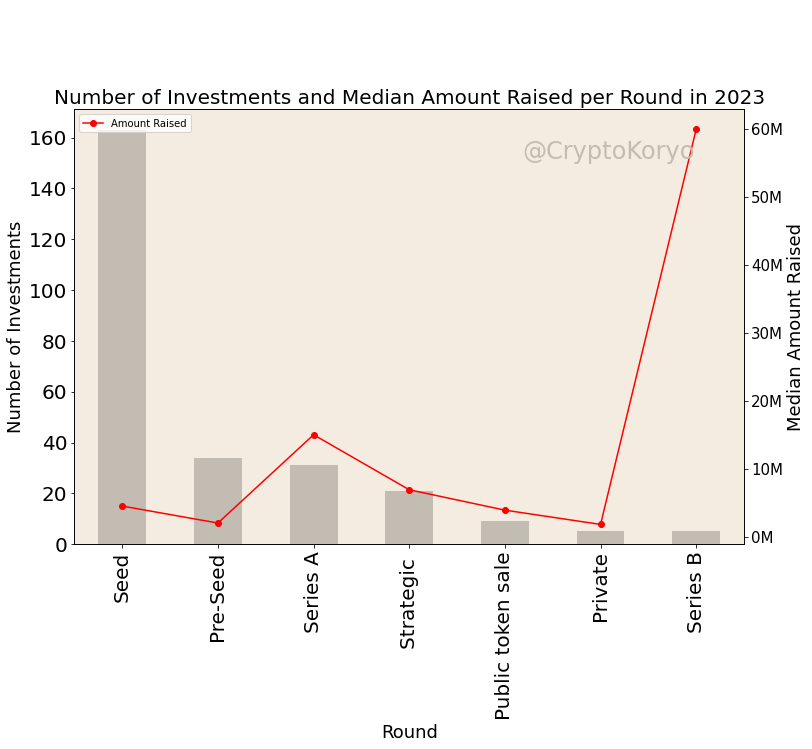

In [145]:
THRESHOLD = 4  

# Create a grouped DataFrame
df_2023 = df[df.Date>'2023']
grouped_df = df_2023.groupby('Round')[['Amount Raised']].count().sort_values('Amount Raised',ascending=False)
filtered_df = grouped_df[grouped_df['Amount Raised'] > THRESHOLD]

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot the count on the primary y-axis
filtered_df.sort_values('Amount Raised', ascending=False).plot(ax=ax1, kind='bar', color='#c3bcb3', fontsize=20)
ax1.get_legend().remove()
ax2 = ax1.twinx()


# Calculate and plot the median on the secondary y-axis
median_df = df_2023.groupby('Round')[['Amount Raised']].median()
median_df.loc[filtered_df.index].plot(ax=ax2, kind='line', color='r', marker='o')

# Set the labels and title
ax1.set_xlabel('Round', fontsize=18)
ax1.set_ylabel('Number of Investments', fontsize=18)
ax2.set_ylabel('Median Amount Raised', fontsize=18)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))
plt.yticks(fontsize=15)

plt.title('Number of Investments and Median Amount Raised per Round in 2023', fontsize=20)


plt.text(0.52,0.75,'@CryptoKoryo',horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes,fontsize=24, color='#c3bcb3')
ax1.set_facecolor('#f4ece0')



plt.show()

In [102]:
# Average (median) round size
(median_df.loc[filtered_df.index]/1e6).sort_values('Amount Raised')

,Amount Raised
Round,
Private,1.8
Pre-Seed,2.0
Public token sale,3.9
Seed,4.5
Strategic,6.9
Series A,15.0
Series B,60.0


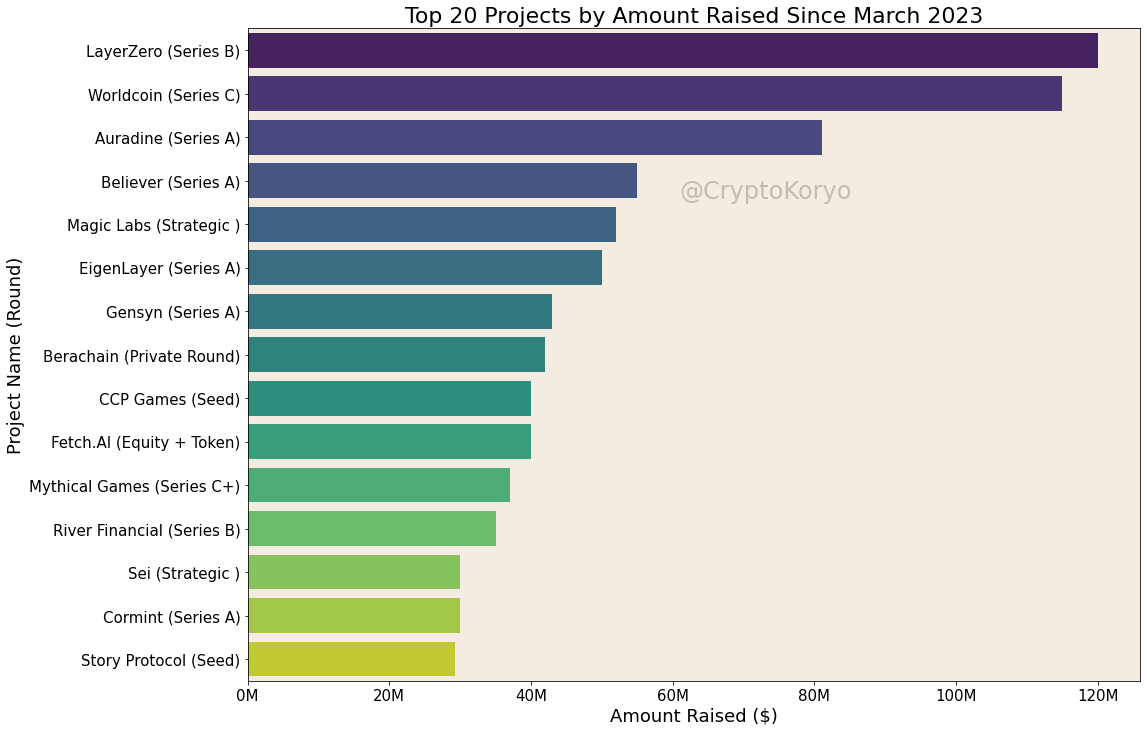

In [137]:
N = 20
top_projects = df[df.Date>'2023-3'].sort_values('Amount Raised', ascending=False).head(N)
top_projects['Name_Round'] = top_projects['Name'] + ' (' + top_projects['Round'] + ')'

plt.figure(figsize=(16, 12))
ax = sns.barplot(x='Amount Raised', y='Name_Round', data=top_projects, palette='viridis')
plt.title(f'Top {N} Projects by Amount Raised Since March 2023', fontsize=22)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Amount Raised ($)', fontsize=18)
plt.ylabel('Project Name (Round)', fontsize=18)

plt.text(0.58,0.75,'@CryptoKoryo',horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes,fontsize=24, color='#c3bcb3')
ax.set_facecolor('#f4ece0')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))


plt.show()

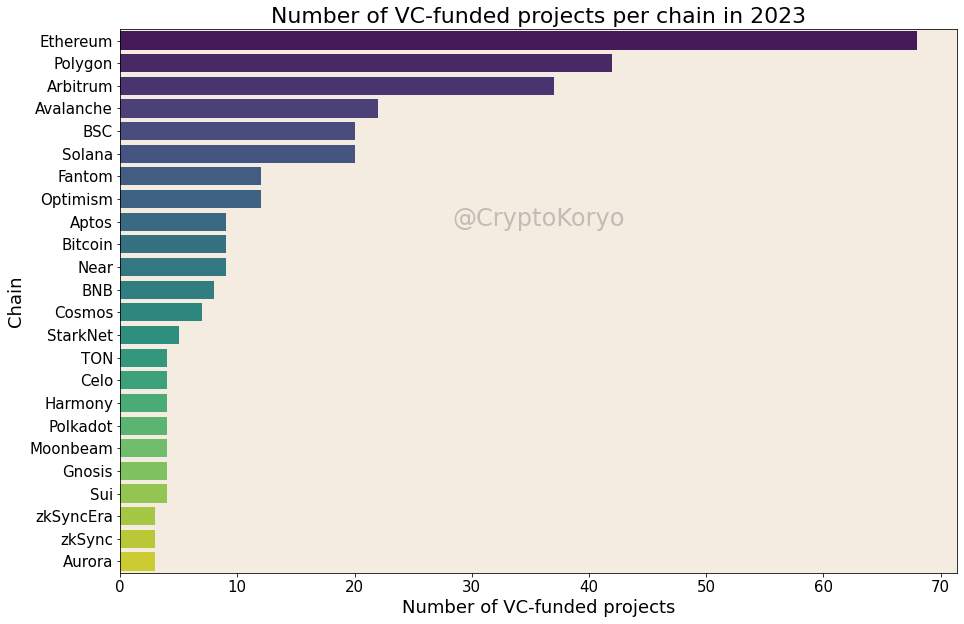

In [426]:
THRESHOLD = 3
df['Chains'] = df['Chains'].str.replace('\s+', '', regex=True)
df_2023_chains = df_2023[~pd.isna(df_2023.Chains)]


# Chain field has values like 'Ethereum + Avalanche + Aurora'
# So we need to explode them so we count each separetely
exploded_df = df_2023_chains.assign(Chains=df_2023_chains['Chains'].str.split('+')).explode('Chains')

# Count the occurrences of each chain
chain_counts = exploded_df['Chains'].value_counts()

# Only keep the chains with THRESHOLD or more counts
filtered_chains = chain_counts[chain_counts >= THRESHOLD].index

# Filter the DataFrame to only include the filtered chains
filtered_df = exploded_df[exploded_df['Chains'].isin(filtered_chains)]

plt.figure(figsize=(15, 10))
ax= sns.countplot(y='Chains', data=filtered_df, order=filtered_df['Chains'].value_counts().index, palette='viridis')
plt.title('Number of VC-funded projects per chain in 2023', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Number of VC-funded projects', fontsize=18)
plt.ylabel('Chain', fontsize=18)

plt.text(0.5,0.65,'@CryptoKoryo',horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes,fontsize=24, color='#c3bcb3')
ax.set_facecolor('#f4ece0')

plt.show()

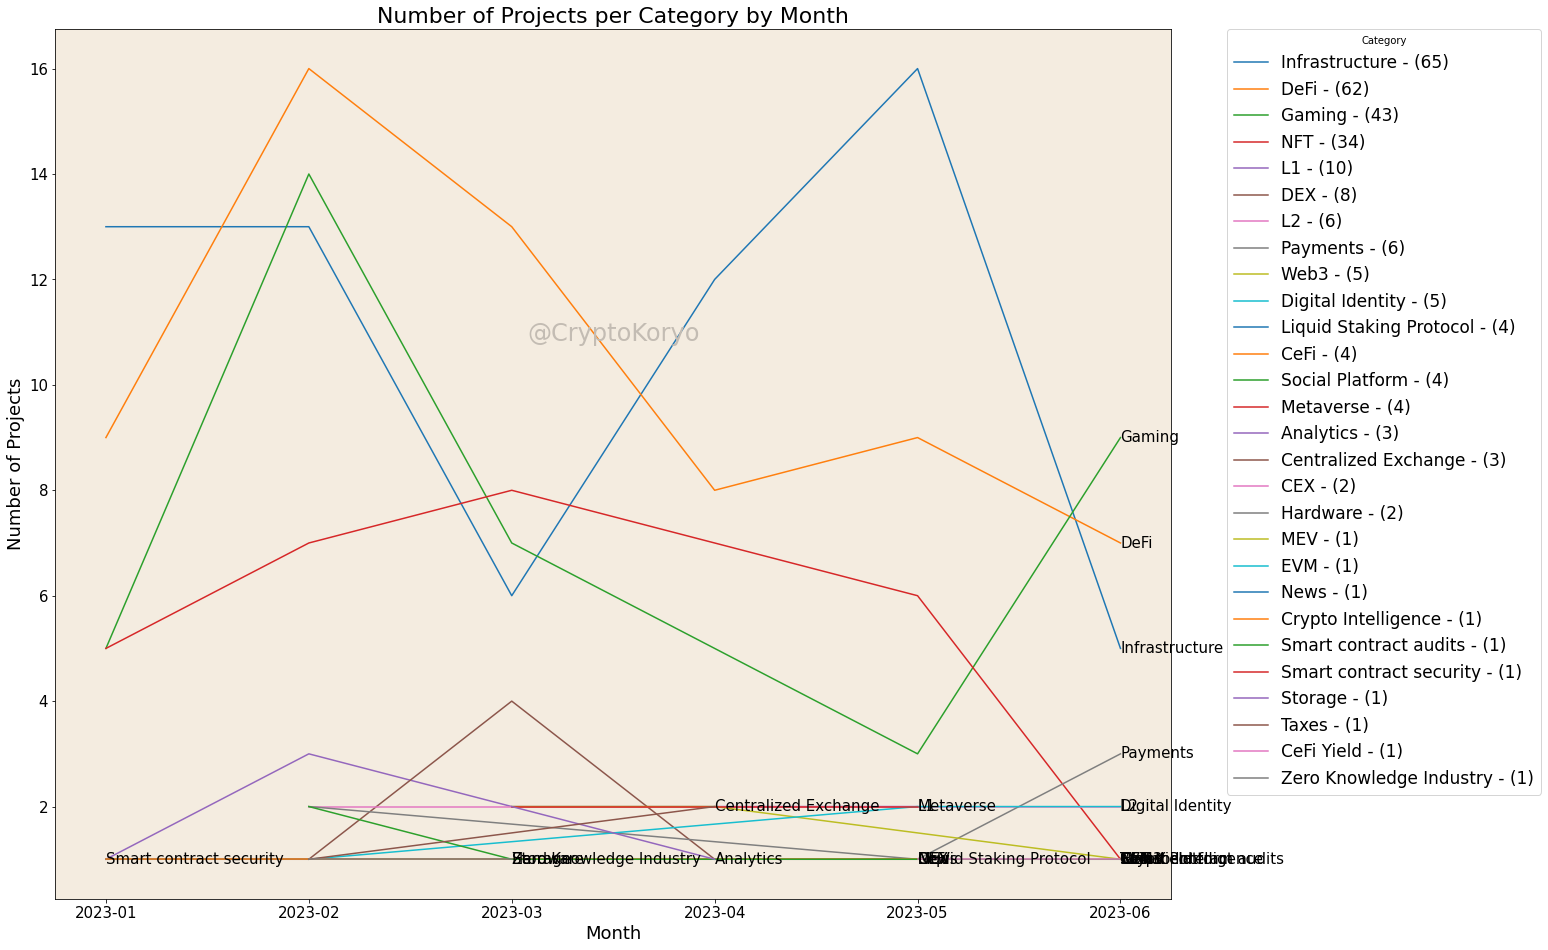

In [425]:
df['Month'] = df['Date'].dt.strftime('%b-%y')
df_2023_category = df_2023[~pd.isna(df_2023.Category)]

df['Month'] = df['Date'].dt.strftime('%b-%y')

# Group by 'Month' and 'Category' and count the number of projects
df_grouped = df_2023_category.groupby(['Month', 'Category'])['Name'].count().reset_index()

# Calculate the total occurrence of each category
category_totals = df_grouped.groupby('Category')['Name'].sum().sort_values(ascending=False)

# Reorder the categories based on total occurrence
category_order = category_totals.index


# Create the lineplot
plt.figure(figsize=(20, 16))
ax = sns.lineplot(x='Month', y='Name', hue='Category', data=df_grouped, palette='tab10', hue_order=category_order)


# Annotate the lines with category names
for line in range(len(category_order)):
    category = category_order[line]
    x = df_grouped[df_grouped['Category'] == category]['Month']
    y = df_grouped[df_grouped['Category'] == category]['Name']
    last_x = x.iloc[-1]
    last_y = y.iloc[-1]
    plt.text(last_x, last_y, category, fontsize=15, ha='left', va='center')

# Reorder the legend based on total occurrence and add occurrence count to labels
handles, labels = plt.gca().get_legend_handles_labels()
reordered_labels = [f'{label} - ({category_totals[label]})' for label in category_order]
plt.legend(handles,reordered_labels, title='Category',fontsize=17 , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Number of Projects per Category by Month',fontsize=22)
plt.xlabel('Month',fontsize=18)
plt.ylabel('Number of Projects',fontsize=18)

plt.text(0.5,0.65,'@CryptoKoryo',horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes,fontsize=24, color='#c3bcb3')
ax.set_facecolor('#f4ece0')

plt.show()

,Name,Date,Amount Raised,Round,Description,Lead Investor,Category,Source,Valuation,Chains,Other Investors,year_quarter,Month,all_investors
Date,,,,,,,,,,,,,,
2023-06-27,Pixion Games,2023-06-27,5500000.0,Seed,NaN,NaN,Gaming,https://twitter.com/PixionGames/status/1673688...,NaN,Avalanche,NaN,2023_Q2,Jun-23,N/A
2023-06-26,MetaBlaze,2023-06-26,4000000.0,Presale,Play-to-earn NFT games,NaN,Gaming,https://twitter.com/meta_blaze/status/16733328...,NaN,NaN,NaN,2023_Q2,Jun-23,N/A
2023-06-10,eZKalibur,2023-06-10,1140000.0,Public token sale,eZKalibur is the first ecosystem-focused and c...,NaN,DeFi,https://dapp.ezkalibur.com/public-launch,NaN,zkSyncEra,NaN,2023_Q2,Jun-23,N/A
2023-06-06,eZKalibur,2023-06-06,392000.0,Private token sale,eZKalibur is the first ecosystem-focused and c...,NaN,DeFi,https://dapp.ezkalibur.com/private-launch,NaN,zkSyncEra,NaN,2023_Q2,Jun-23,N/A
2023-06-01,Fusionist,2023-06-01,6600000.0,Seed,Blockchain game & game infrastructure layer,NaN,NaN,https://twitter.com/BinanceLabs/status/1664081...,NaN,NaN,NaN,2023_Q2,Jun-23,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,Docademic,2014-08-01,1100000.0,Seed,2 services: Worlds largest Free Video-Telemedi...,NaN,NaN,NaN,NaN,NaN,NaN,2014_Q3,Aug-14,N/A
2014-08-01,bitbank,2014-08-01,1300000.0,Angel Round,"Bitcoin wallet, payment processing, bitcoin re...",NaN,NaN,NaN,NaN,NaN,NaN,2014_Q3,Aug-14,N/A
2014-07-22,BitFlyer,2014-07-22,1600000.0,Series A,BitFlyer is a bitcoin exchange and marketplace...,NaN,Centralized Exchange,NaN,NaN,NaN,NaN,2014_Q3,Jul-14,N/A


In [380]:
def get_all_investors(x):
    if (pd.isna(x['Lead Investor']))&(pd.isna(x['Other Investors'])):
        return 'N/A'
    else :
        
        if (pd.isna(x['Lead Investor'])):
            return str(x['Other Investors'])
        else:
            if (pd.isna(x['Other Investors'])):
                return str(x['Lead Investor'])
            else:
                return str(x['Lead Investor']) + ' + ' + str(x['Other Investors'])
        

# Combine Lead investors and other investors in one field
df['all_investors'] = df.apply(lambda x: get_all_investors(x),axis=1)
df['all_investors'] = df['all_investors'].str.replace('\s+', '', regex=True)

# We look at 2023 data and remove null values
df_investors = df[(df['all_investors']!='N/A')&(df['all_investors']!='nan')&(df.Date>'2023')].reset_index(drop=True)



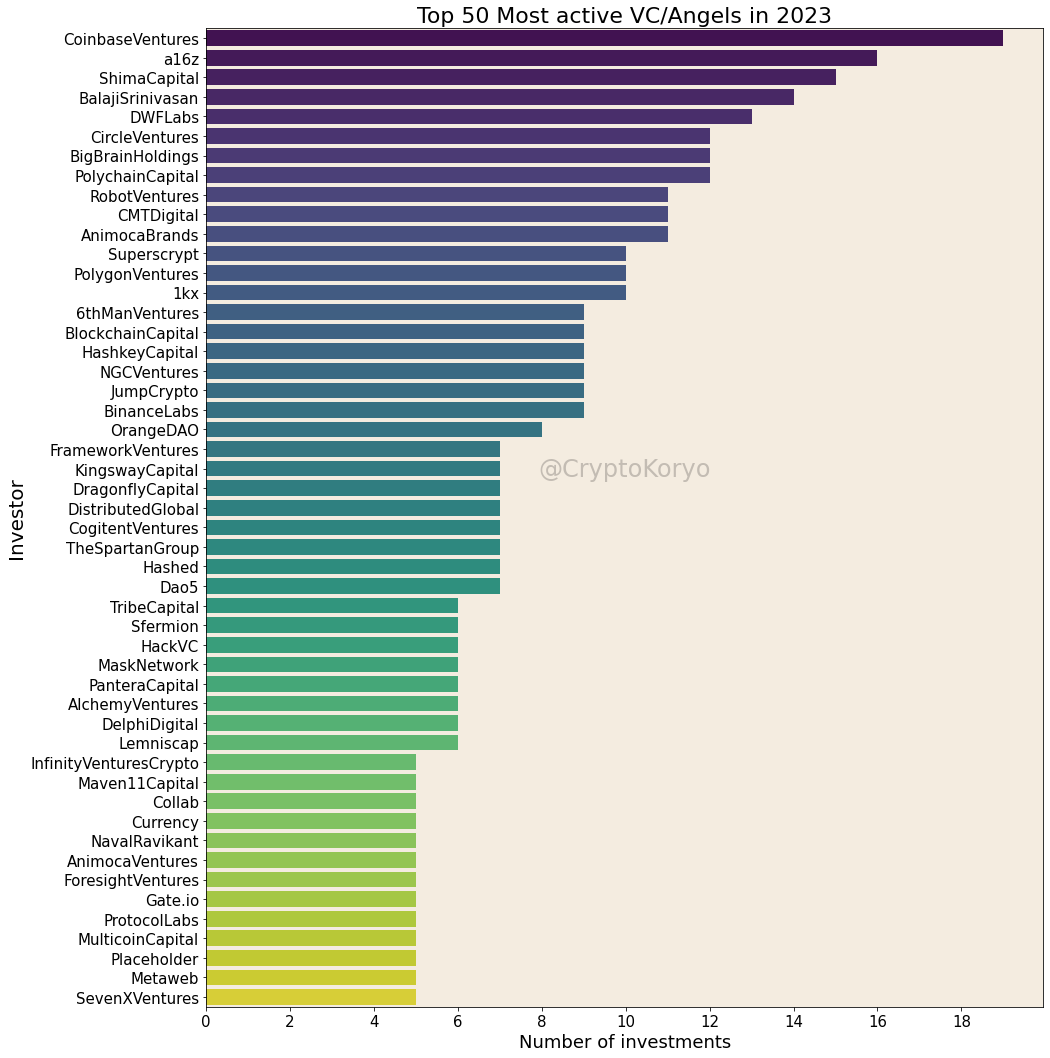

In [393]:
# Chain field has values like 'Ethereum + Avalanche + Aurora'
# So we need to explode them so we count each separetely
exploded_investors_df = df_investors.assign(all_investors=df_investors['all_investors'].str.split('+')).explode('all_investors')

# 'a16zcrypto' and 'a16zgames' is considered as a16z
exploded_investors_df.loc[exploded_investors_df['all_investors'].str.contains('a16z'), 'all_investors'] = 'a16z'
# Count the occurrences of each chain
chain_counts = exploded_investors_df['all_investors'].value_counts()

# Only keep the chains with THRESHOLD or more counts
filtered_chains = chain_counts[chain_counts >= THRESHOLD].index

# Filter the DataFrame to only include the filtered chains
filtered_df = exploded_investors_df[exploded_investors_df['all_investors'].isin(filtered_chains)]

# Get the top N chains by occurrence
N = 50
top_30_chains = filtered_df['all_investors'].value_counts().nlargest(N).index

# Filter the DataFrame to include only the top 30 chains
filtered_df = filtered_df[filtered_df['all_investors'].isin(top_30_chains)]
filtered_df= filtered_df.reset_index(drop=True)

plt.figure(figsize=(15, 18))
ax= sns.countplot(y='all_investors', data=filtered_df, order=filtered_df['all_investors'].value_counts().index, palette='viridis')


plt.title(f'Top {N} Most active VC/Angels in 2023', fontsize=22)

plt.xticks(range(0, int(filtered_df['all_investors'].value_counts().max()) + 1, 2), fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Number of investments', fontsize=18)
plt.ylabel('Investor', fontsize=20)

plt.text(0.5,0.55,'@CryptoKoryo',horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes,fontsize=24, color='#c3bcb3')
ax.set_facecolor('#f4ece0')

plt.show()

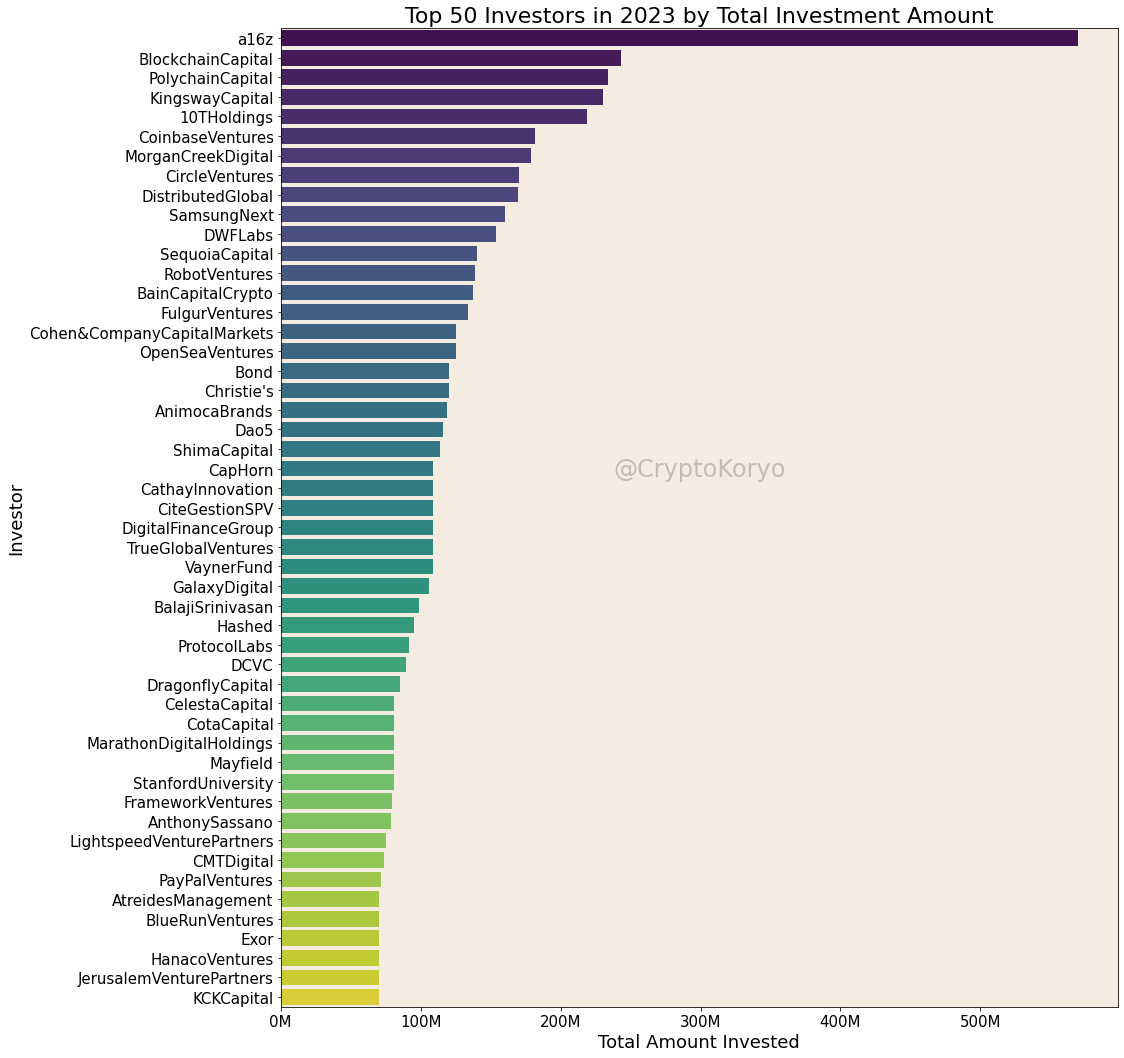

In [395]:
# Group by 'investor' and calculate the sum of 'Amount invested'
top_investors = exploded_investors_df.groupby('all_investors')['Amount Raised'].sum().nlargest(N)

# Reset the index to convert the grouped data into a DataFrame
top_investors = top_investors.reset_index()

# Create the bar plot using Seaborn
plt.figure(figsize=(15, 18))
ax= sns.barplot(x='Amount Raised', y='all_investors', data=top_investors, palette='viridis')

plt.title(f'Top {N} Investors in 2023 by Total Investment Amount', fontsize=22)


plt.xlabel('Total Amount Invested', fontsize=18)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))
plt.ylabel('Investor', fontsize=18)

plt.text(0.5,0.55,'@CryptoKoryo',horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes,fontsize=24, color='#c3bcb3')
ax.set_facecolor('#f4ece0')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.show()

# NLP

In [458]:
import spacy
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load("en_core_web_sm")

In [433]:
q2_2023_descriptions = df[df.Date>'2023-3'][['Description']].reset_index(drop=True)
q2_2023_descriptions

,Description
0,Mythical Games is a video game engine for play...
1,NaN
2,Play-to-earn NFT games
3,AI-powered search engine for crypto
4,Hybrid Orderbook-AMM DEX
...,...
221,Decentralized exchange for asset-backed tokens
222,Web3 content creation platform
223,blockchain operational intelligence and risk m...
224,Fractional NFT spot exposure combined with pas...


In [497]:
hooks = ' '.join(q2_2023_descriptions['Description'].astype(str).tolist())

In [502]:
doc = nlp(hooks)

# Remove verbs and adjevtives from the text
filtered_text = " ".join([token.text for token in doc if token.pos_ not in ["VERB", "ADJ"]])

#
stop_words = nlp.Defaults.stop_words
filtered_text = ' '.join([word for word in filtered_text.split() if word.lower() not in stop_words])
filtered_text = filtered_text.lower()

# Remove irrelevant words
words_to_remove = ['platform','protocol','web3','chain','blockchain','crypto','defi','nan']

for word in words_to_remove:
    filtered_text = filtered_text.replace(word, '')
     
    
len(filtered_text), len(hooks)

(5879, 10170)

In [503]:
# Fit the TF-IDF vectorizer on to pick words based on their frequency and weights
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([filtered_text])
feature_names = vectorizer.get_feature_names()

# Calculate the TF-IDF scores for each word in the text
tfidf_scores = tfidf_matrix.toarray()[0]

# Create and sort a dictionary with words and their corresponding TF-IDF scores
word_scores = dict(zip(feature_names, tfidf_scores))
sorted_word_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)


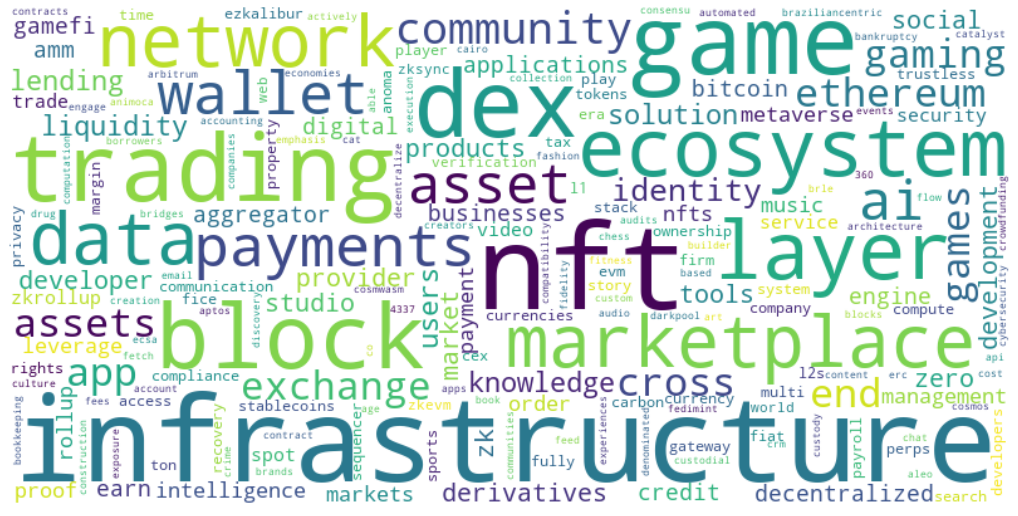

In [505]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(sorted_word_scores))
plt.figure(figsize=(18, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [506]:
sorted_word_scores

[('infrastructure', 0.350472388159464),
 ('nft', 0.350472388159464),
 ('game', 0.22135098199545097),
 ('dex', 0.2029050668291634),
 ('trading', 0.2029050668291634),
 ('block', 0.1844591516628758),
 ('ecosystem', 0.16601323649658822),
 ('layer', 0.16601323649658822),
 ('data', 0.12912140616401308),
 ('marketplace', 0.12912140616401308),
 ('network', 0.12912140616401308),
 ('payments', 0.12912140616401308),
 ('wallet', 0.12912140616401308),
 ('ai', 0.11067549099772549),
 ('asset', 0.11067549099772549),
 ('community', 0.11067549099772549),
 ('app', 0.0922295758314379),
 ('assets', 0.0922295758314379),
 ('cross', 0.0922295758314379),
 ('end', 0.0922295758314379),
 ('ethereum', 0.0922295758314379),
 ('exchange', 0.0922295758314379),
 ('games', 0.0922295758314379),
 ('gaming', 0.0922295758314379),
 ('identity', 0.0922295758314379),
 ('knowledge', 0.0922295758314379),
 ('lending', 0.0922295758314379),
 ('liquidity', 0.0922295758314379),
 ('solution', 0.0922295758314379),
 ('users', 0.09222957